<a href="https://colab.research.google.com/github/GyaviWalls/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Ayebare Gyavira.B

## Project Overview

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

---

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it. As data scientists, about [80% of our time is spent on data preparation](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=478ec4796f63) - so this is a very important step!

---

Download the data using this link: [download the data.](https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view?usp=sharing) \(Note: [Original data source](https://https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)).
Insert code below the heading "Loading Data"
Use Pandas to read the sales prediction data set into Google Colab.
Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
Insert code below the heading "Data Cleaning"
Explore the data - what do you need to do to clean this data? Clean it!
Be sure to address each of the following tasks:

---

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

---

Here is the Data Dictionary for this dataset:

| Variable Name | Description |
|:--------:|:--------:|
|  Item_Identifier |  Product ID   |
|  Item_Weight |  Weight of product  |
|  Item_Fat_Content	  |  Whether the product is low-fat or regular |
|  Item_Visibility	  |  The percentage of total display area of all products in a store allocated to the particular product   |
|  Item_Type |  The category to which the product belongs  |
|  Item_MRP  |  Maximum Retail Price (list price) of the product  |
|  Outlet_Identifier   |  Store ID   |
|  Outlet_Establishment_Year	  |  The year in which store was established |
|  Outlet_Size |  The size of the store in terms of ground area covered  |
|  Outlet_Location_Type |  The type of area in which the store is located   |
|  Outlet_Type |  Whether the outlet is a grocery store or some sort of supermarket  |
|  Item_Outlet_Sales |  Sales of the product in the particular store. This is the target variable to be predicted  |



# Imports

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading Data


In [2]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
sales_df = pd.read_csv(fpath)

sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning



1) Number of rows and columns


In [4]:
sales_df.shape

(8523, 12)

*   There are 8523 rows and 12 columns

2) Checking the datatypes of each variable



In [5]:
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

* The datatypes seem appropriate

* There appear to be some null values in features Item_Weight and Outlet_size




3) Checking and dropping duplicate values if existent

In [6]:
sales_df.duplicated().sum()

0



* since all features show 0 duplicates, we'll proceed!



4) Identifying and dropping missing values

In [7]:
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* Visualising sales dataset to determine relation between the missing values

<Axes: >

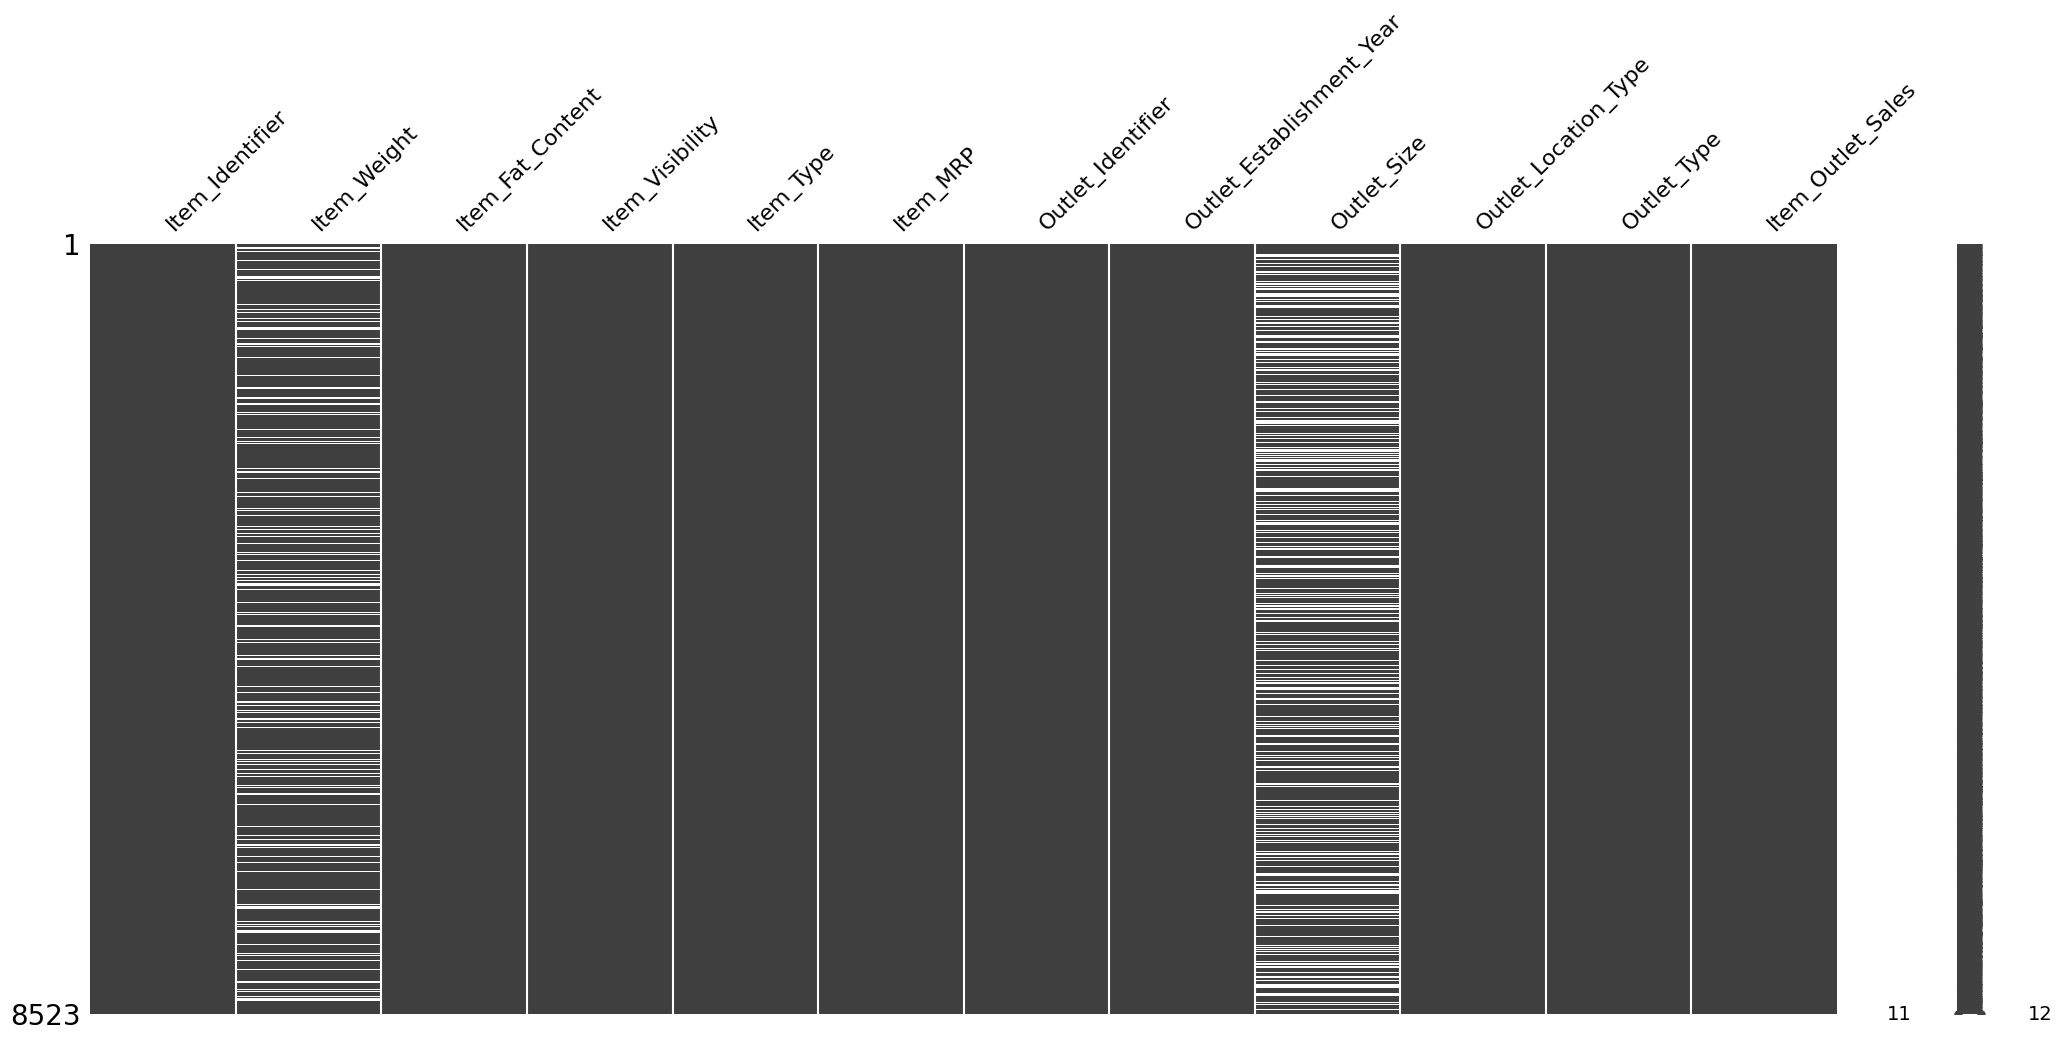

In [8]:
msno.matrix(sales_df)

*It appears random so we'll let it be!*

5) Address the missing values by using a placeholder value.

* Replacing missing values within Outlet_Size of type 'object' with 'MISSING' placeholder

In [9]:
# str_cols = sales_df.select_dtypes('object').columns
# sales_df[str_cols] = sales_df[str_cols].fillna('MISSING')

* Replacing missing values within Item_Weight feature with the column mean for a placeholder

In [10]:
# sales_df['Item_Weight'].fillna(np.nan, inplace=True)

6) confirming there are no missing values

In [11]:
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

7) checking and fixing other data inconsistencies...




In [12]:
for col in sales_df.columns:
  print(sales_df[col].value_counts())
  print('\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat     

"Item_Fat_Content" has redundant values in it

In [13]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

* fixing redundancy with appropriate replacements

In [14]:
replace_dict = {'low fat': 'Low Fat',
             'reg': 'Regular',
             'LF': 'Low Fat'}

sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(replace_dict)

* confirming that the replacements have been made

In [15]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) obtaining numerical statistics for numeric features

* first obtaining all columns with numeric data

In [16]:
numeric_cols = sales_df.select_dtypes('number').columns

* displaying statistics of columns with numeric data

In [17]:
sales_df[numeric_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis


Creating exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.

In [18]:
# %history -g


Obtaining the columns with numeric datatypes

In [19]:
numer_cols = sales_df.select_dtypes('number').columns
numer_cols


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

Removing the column whose plot is unnecessary

In [20]:
numer_cols = numer_cols.drop('Outlet_Establishment_Year')
numer_cols


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

Creating helper functions to display the plots in an organised format...

In [21]:
def plot_hist_and_box(df, col):
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
            label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
            label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'Exploratory Data Analysis for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()


def cat_plot(df, col):
  ord = df[col].value_counts().index
  ax = sns.countplot(df, x=col, order=ord)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f'Exploratory Data Analysis for {col}');



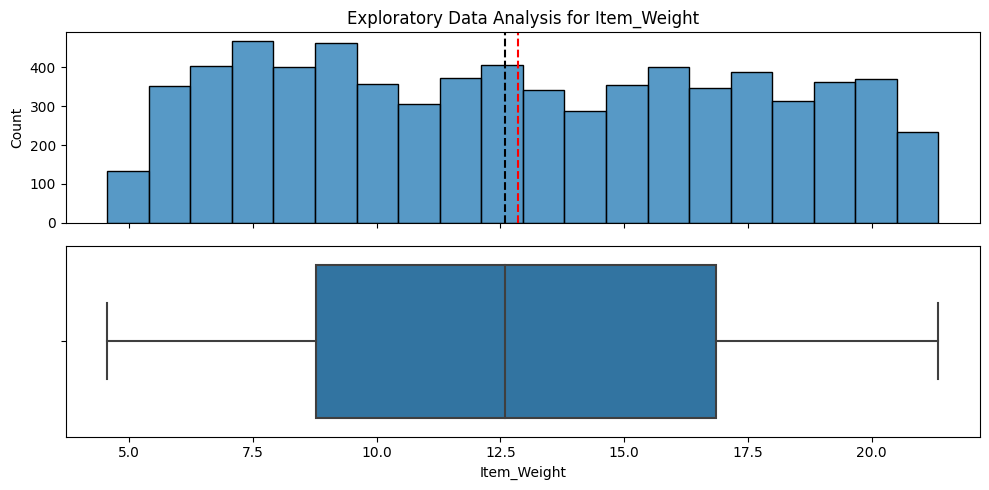

In [22]:
plot_hist_and_box(sales_df, numer_cols[0])

For the Item_Weight feature:
  - The mean and median appear to be at the same point
  - There exist no outliers probably because the null values were replaced with a placeholder
  - The values of this feature range from slightly below 5 to slightly above 20

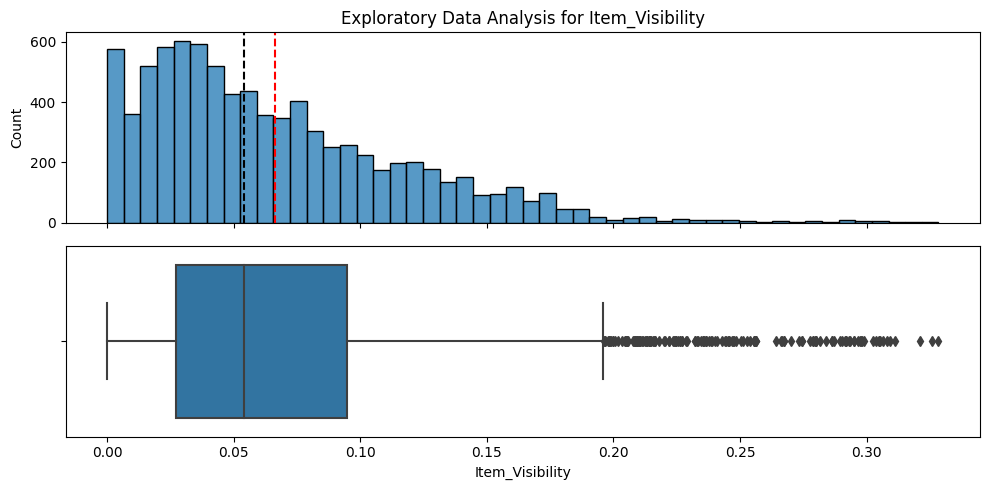

In [23]:
plot_hist_and_box(sales_df, numer_cols[1])

- There exist lots of outliers for the Item_Visibility feature
- The mean is slightly higher than the median
- Both the mean and median exist within the range of 0.05 and 0.1
- The quartile range runs all the way from 0.0 to slightly below 0.2

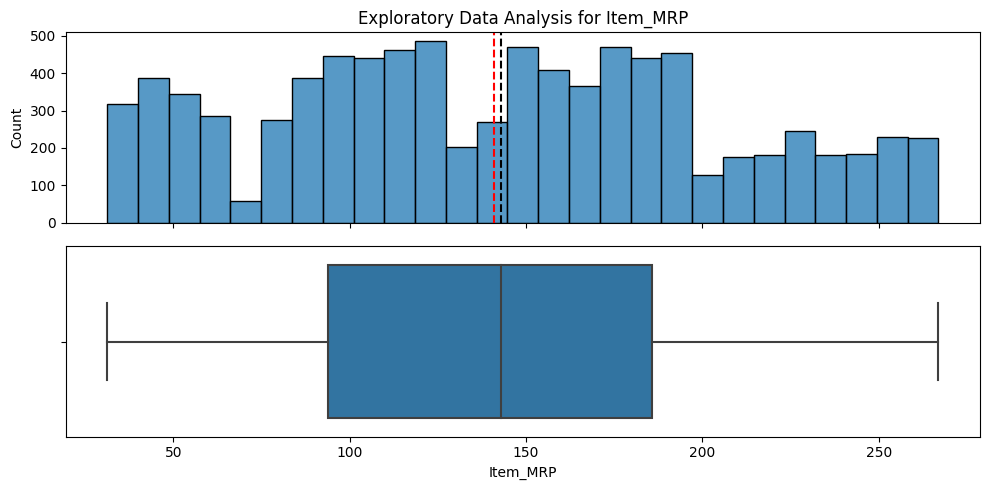

In [24]:
plot_hist_and_box(sales_df, numer_cols[2])

For the Item maximum retail price:
  - There are no outliers for this feature
  - The mean value exists below the median
  - The quartile range runs from slightly below 50 to slightly above 250

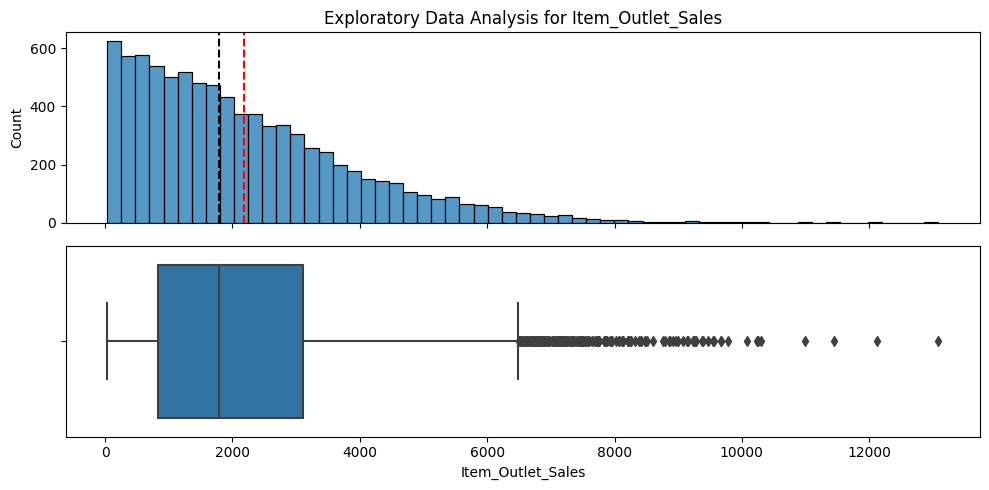

In [25]:
plot_hist_and_box(sales_df, numer_cols[3])

- There exist numerous outliers for the item outlet sales feature
- The median exists below the mean value for this feature
- The value of the mean is above 2000 but below 4000 and that of the median is slightly below 2000
- The quartile range runs from 0 to between 6000 and 7000

Obtaining columns with categorical data associated to them

In [26]:
cat_cols = sales_df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Removal of features whose plots are close to irrelevant

In [27]:
cat_cols = cat_cols.drop(['Item_Identifier', 'Outlet_Identifier'])
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

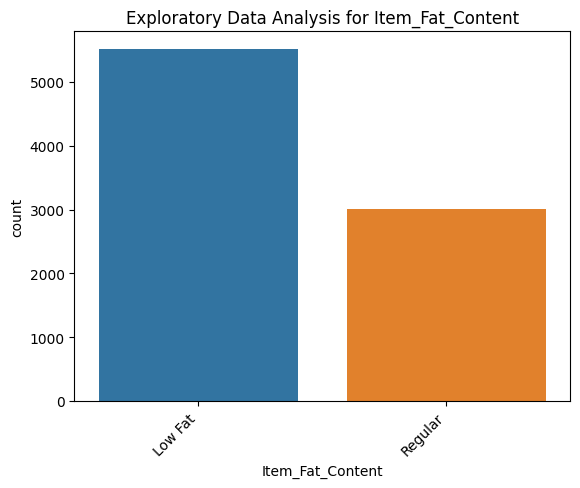

In [28]:
cat_plot(sales_df, cat_cols[0])
sales_df[cat_cols[0]].value_counts()

- The frequency of low fat content is greater than the regular fat content
- The value of low fat content exists above 5000 and thaat of reguar content is around 3000

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

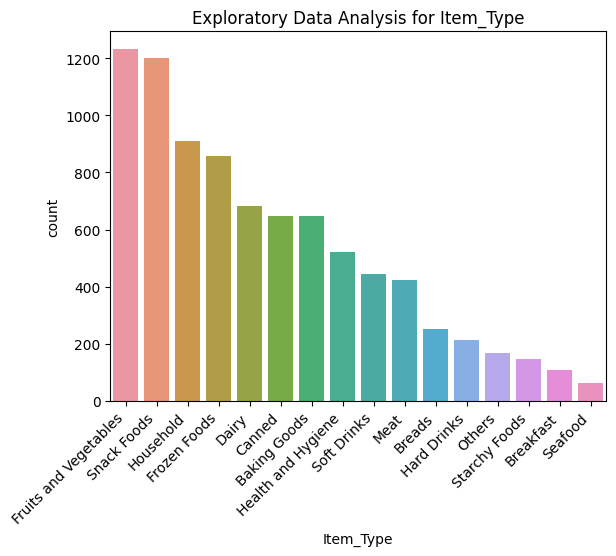

In [29]:
cat_plot(sales_df, cat_cols[1])
sales_df[cat_cols[1]].value_counts()


- The item type with the maximum number of occurrences is fruits and vegetables
- The item type with the minimum number of occurrences is seafood
- The seafood value exists between 0 and 100 and that of fruits and vegetables lies slightly above 1200

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

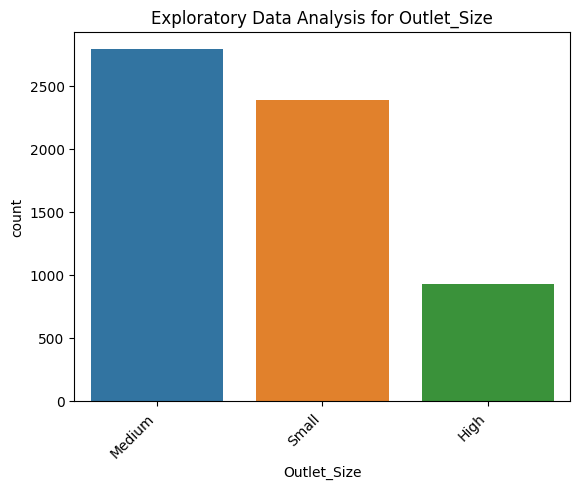

In [30]:
cat_plot(sales_df, cat_cols[2])
sales_df[cat_cols[2]].value_counts()


- The outlet size with the most occurrences is the 'medium' existing slightly above 2500
- The outlet size with the least occurrences is the 'high' lying between 500 and 1000
- There were lots of missing values for this specified feature evident by the label being the 2nd largest in terms of occurrence

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

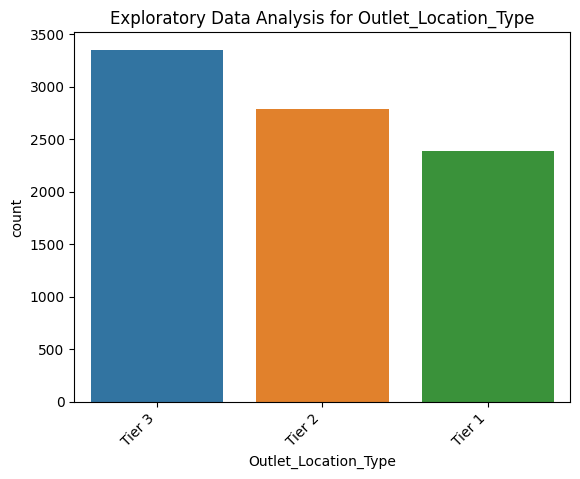

In [31]:
cat_plot(sales_df, cat_cols[3])
sales_df[cat_cols[3]].value_counts()


- The tier 3 outlet location type is most favoured in terms of occurrence
- The tier 1 outlet location type is least favoured in terms of occurrence

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

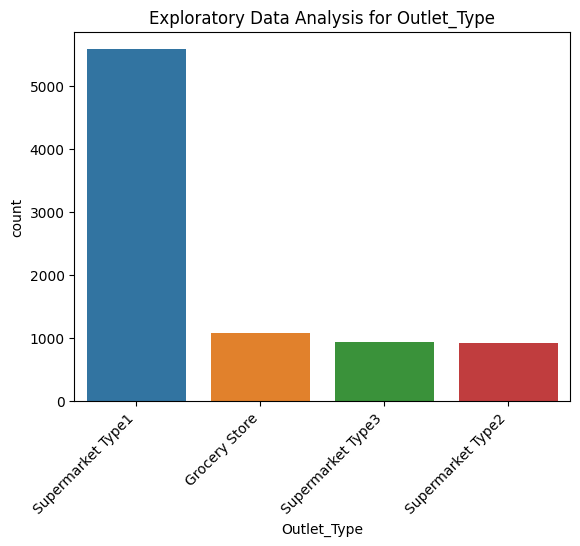

In [32]:
cat_plot(sales_df, cat_cols[4])
sales_df[cat_cols[4]].value_counts()


- with exception of the supermarket type 1 outlet type, the rest are below 1000 in occurrence
- The supermarket type 1 outlet type has the maximum value that lies slightly above 5000

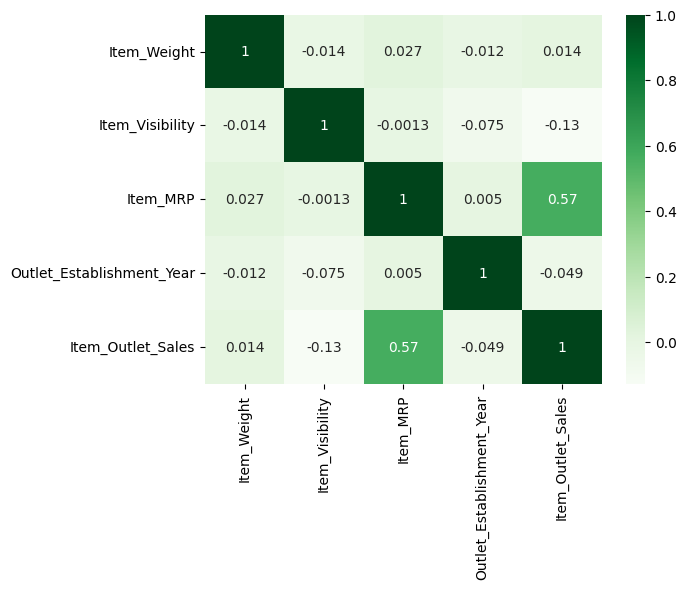

In [33]:
# plotting the heatmap for the numeric features of the dataframe
sns.heatmap(sales_df.corr(numeric_only=True), annot=True, cmap='Greens');


- There is a moderate positive correlation between item outlet sales and item maximum retail price
- There is a weak negative correlation between the item outlet sales and the item visibility
- The rest of the relations are relatively small and are considered minimal

---

Customised heatmap to show displayed relations in the readme file

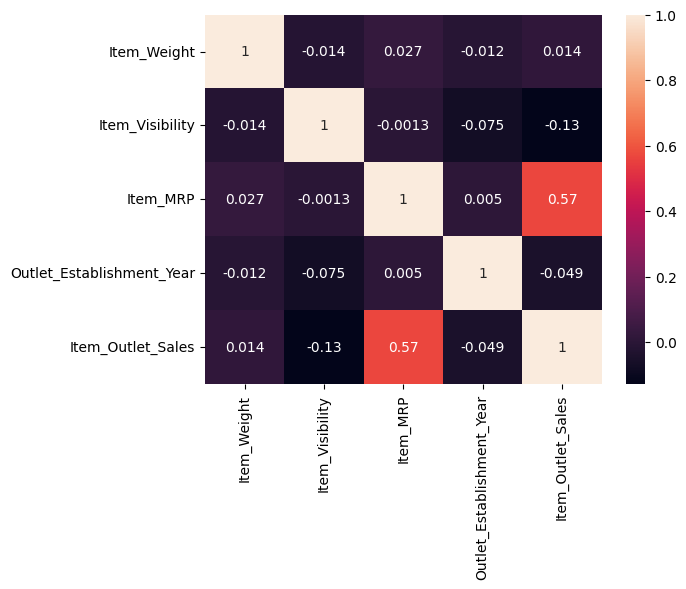

In [34]:
sns.heatmap(sales_df.corr(numeric_only=True), annot=True);

Visualisation to indicate relation of item outlet sales in the readme file

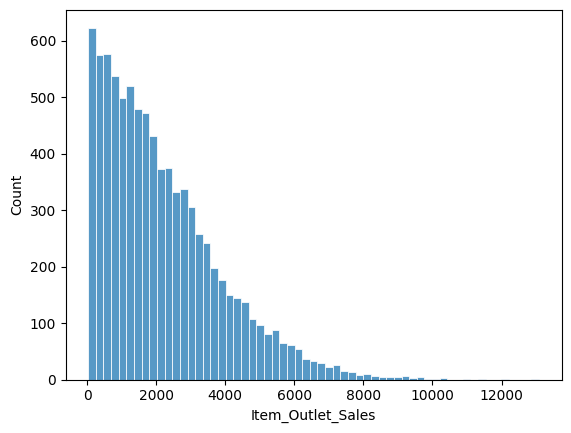

In [35]:
ax = sns.histplot(sales_df, x='Item_Outlet_Sales', edgecolor='white');

---

# Explanatory Data Analysis

In [36]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax





# Final version of function
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax


In [37]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")






# Add **kwargs as keyword when defining function
# Include **kwargs in the sns.regplot() within the function

def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax


# Feature Inspection


In [38]:
### the following are too large
# item_identifier and item_weight
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Inspecting Each Feature

### Item_Weight

- Weight of product

  - Low Fat
  - Regular

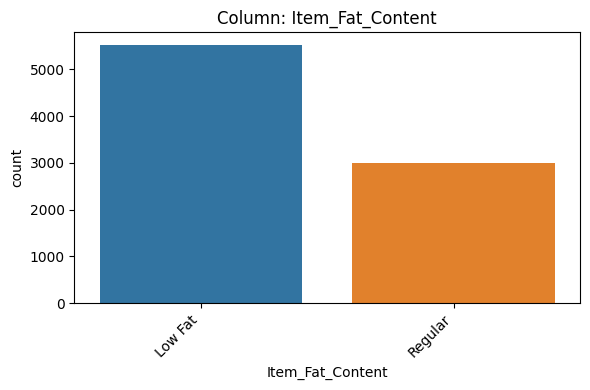

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [39]:
# Item_Identifier
explore_categorical(sales_df, 'Item_Fat_Content');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique values (very low).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



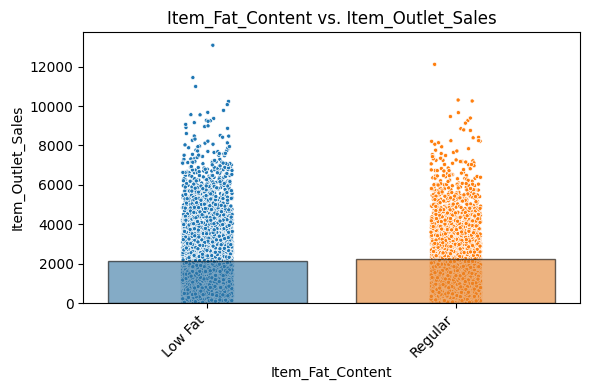

In [40]:
plot_categorical_vs_target(sales_df, 'Item_Fat_Content');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes

___

### Item_Type

- The category to which the product belongs

  - Dairy
  - Soft Drinks
  - Meat
  - Fruits and Vegetables
  - Household
  - Baking Goods
  - Snack Foods
  - Frozen Foods
  - Breakfast
  - Health and Hygiene
  - Hard Drinks
  - Canned
  - Breads
  - Starchy Foods others
  - Seafood

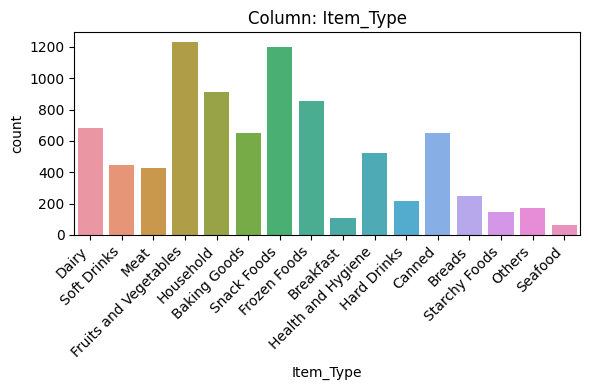

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [41]:
explore_categorical(sales_df, 'Item_Type');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique values (very low).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



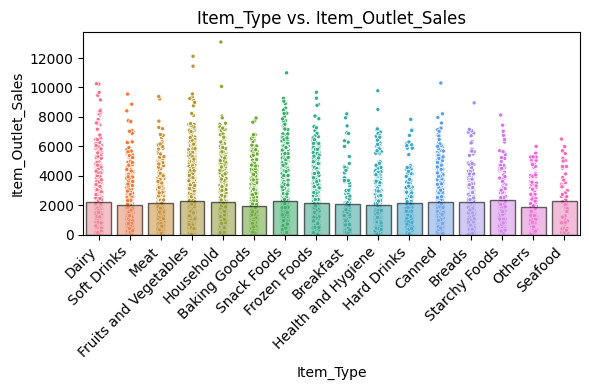

In [42]:
plot_categorical_vs_target(sales_df, 'Item_Type');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes

___

### Outlet_Identifier

- Store ID

  - OUT049
  - OUT018
  - OUT010
  - OUT013
  - OUT027
  - OUT045
  - OUT017
  - OUT046
  - OUT035
  - OUT019

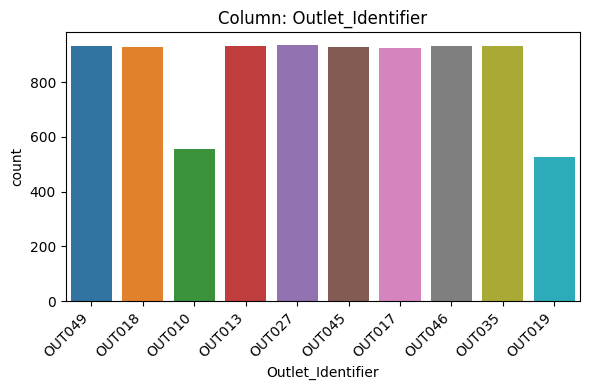

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [43]:
explore_categorical(sales_df, 'Outlet_Identifier');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 10 unique values (very low).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



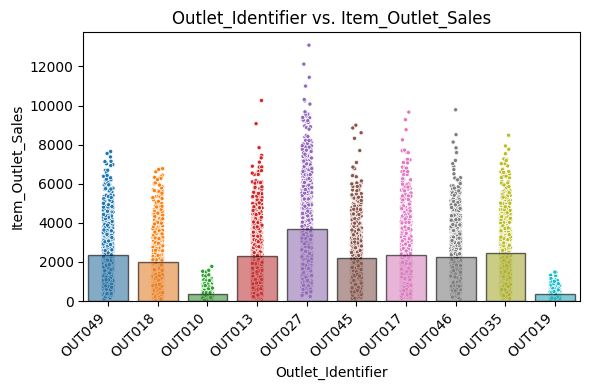

In [44]:
plot_categorical_vs_target(sales_df, 'Outlet_Identifier');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes

___

### Outlet_Size

- The size of the store in terms of ground area covered

  - Medium
  - MISSING
  - Small
  - High

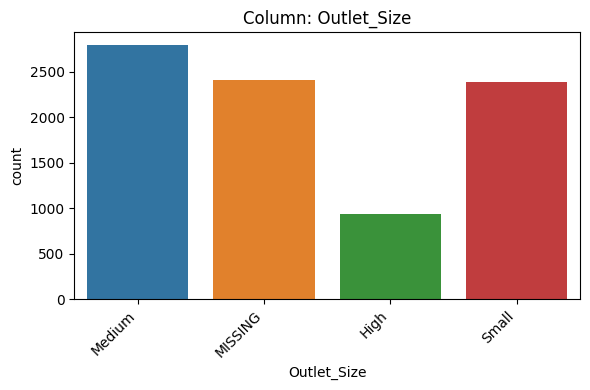

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [45]:
explore_categorical(sales_df, 'Outlet_Size');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 (28.28%). Impute with the value 'missing'.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique values (very low).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



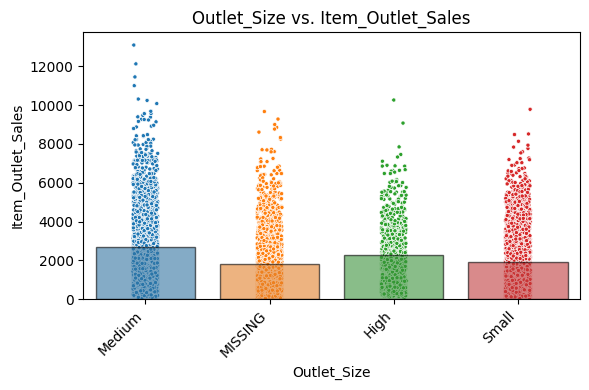

In [46]:
plot_categorical_vs_target(sales_df, 'Outlet_Size');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes

___

### Outlet_Location_Type

- The type of area in which the store is located

  - Tier 1
  - Tier 2
  - Tier 3

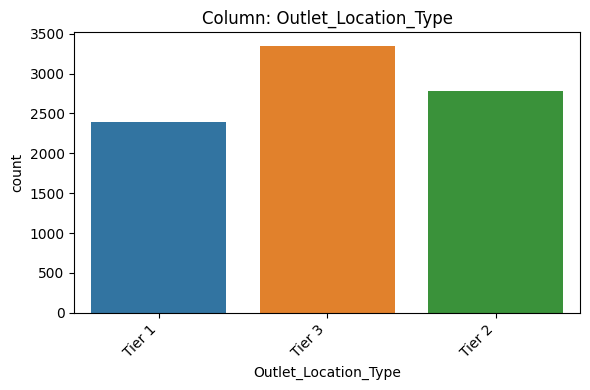

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [47]:
explore_categorical(sales_df, 'Outlet_Location_Type');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique values (very low).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



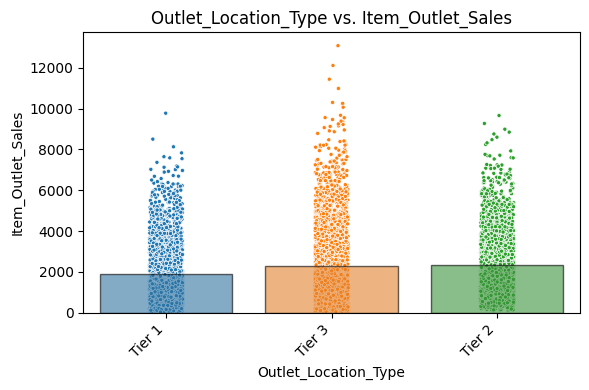

In [48]:
plot_categorical_vs_target(sales_df, 'Outlet_Location_Type');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes

___

### Outlet_Type

- Whether the outlet is a grocery store or some sort of supermarket

  - Supermarket Type1
  - Supermarket Type2
  - Grocery Store
  - Supermarket Туре3

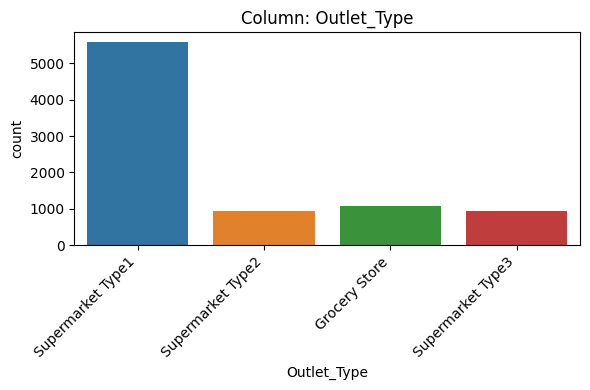

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [49]:
explore_categorical(sales_df, 'Outlet_Type');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique values (very low).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



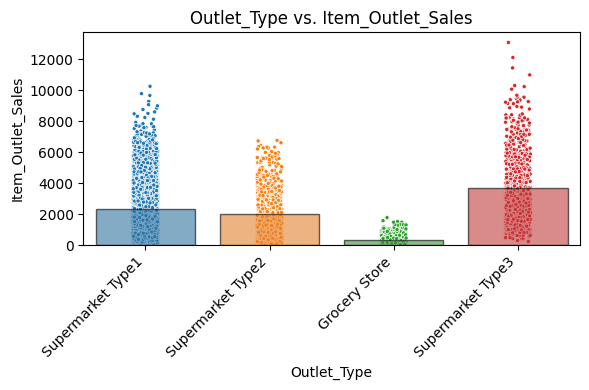

In [50]:
plot_categorical_vs_target(sales_df, 'Outlet_Type');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes

___

### Item_Weight

- Weight of product


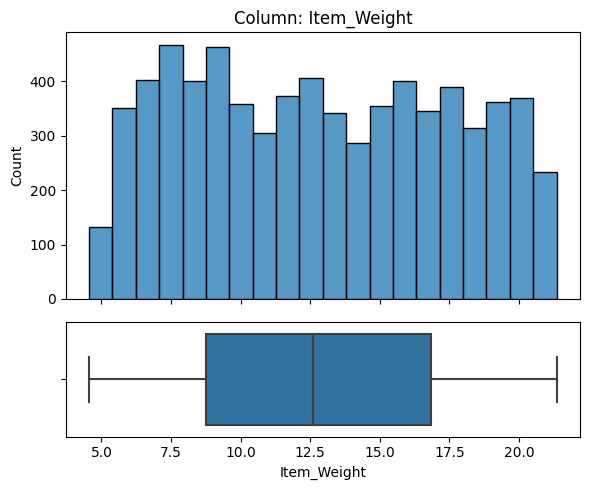

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [51]:
explore_numeric(sales_df, 'Item_Weight');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%). Impute with the mean value

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 415 unique values (very high).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



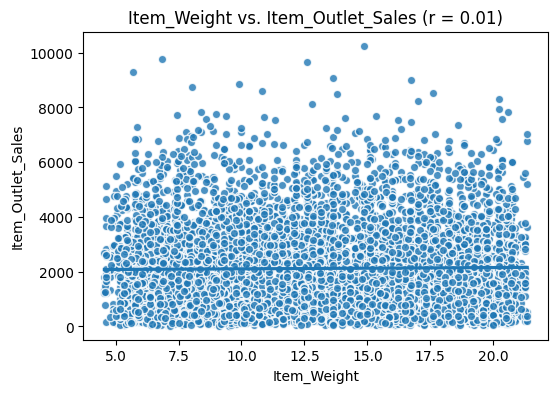

In [52]:
plot_numeric_vs_target(sales_df, 'Item_Weight');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes. Easy to carry items are generally more desireable
  - Does this feature appear to be a predictor of the target?
    - NO. All values are scattered plus that correlation coefficient is not convincing

___

### Item_Visibility

- The percentage of total display area of all products in a store allocated to the particular product


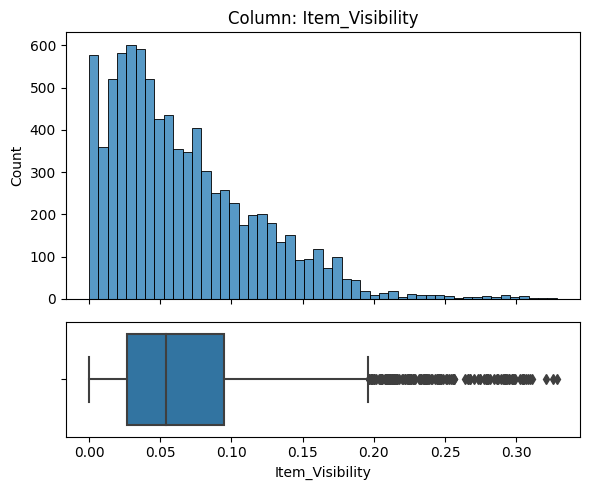

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [53]:
explore_numeric(sales_df, 'Item_Visibility');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 7880 unique values (very high).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



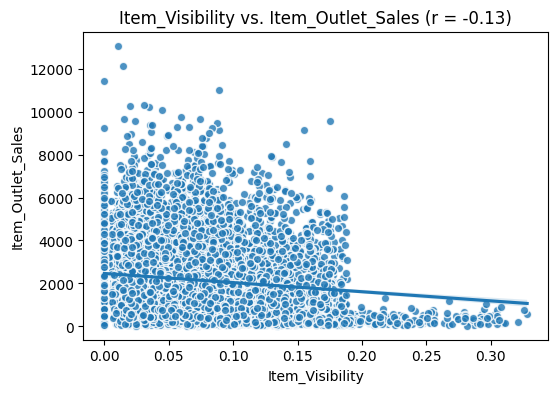

In [54]:
plot_numeric_vs_target(sales_df, 'Item_Visibility');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes. It'd take an expert to notice something hidden
  - Does this feature appear to be a predictor of the target?
    - Yes. Of sorts, i guess the correlation is a little favourable though still low

___

### Item_MRP

- Maximum Retail Price (list price) of the product


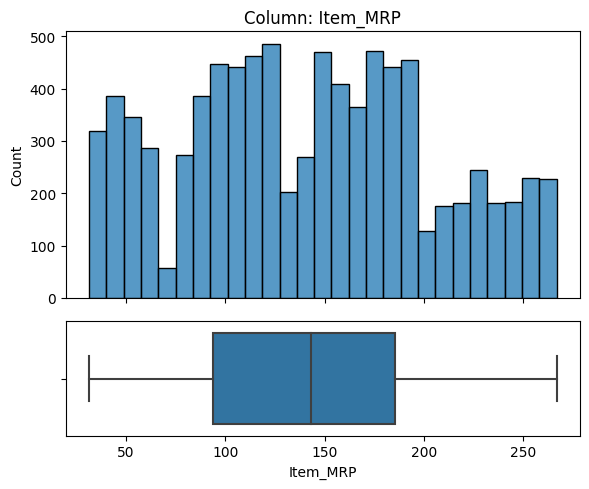

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [55]:
explore_numeric(sales_df, 'Item_MRP');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 5938 unique values (very high).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



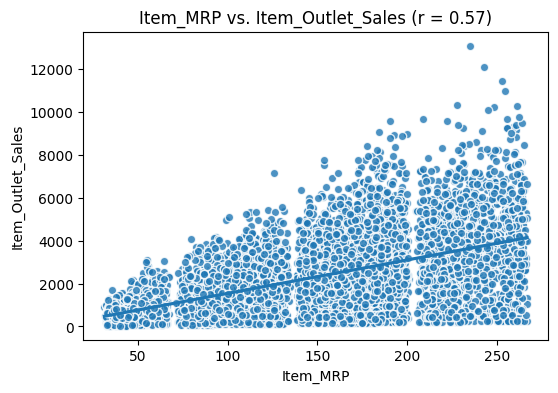

In [56]:
plot_numeric_vs_target(sales_df, 'Item_MRP');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes. Customers can plan accordingly and be within the ranges of their budget expenditures.
  - Does this feature appear to be a predictor of the target?
    - Yes

___

### Outlet_Establishment_Year

- The year in which store was established


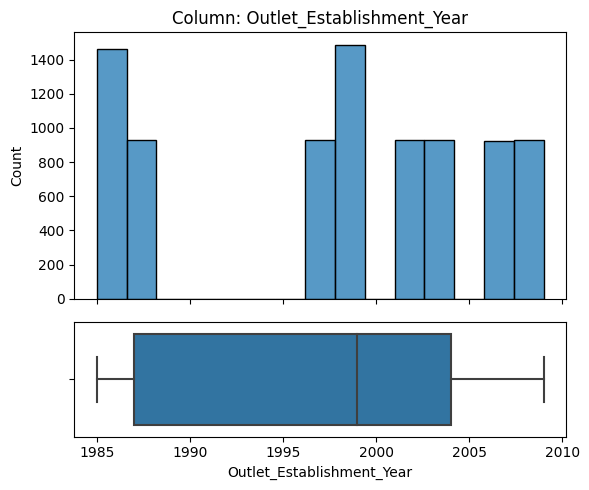

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [57]:
explore_numeric(sales_df, 'Outlet_Establishment_Year');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 9 unique values (high).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



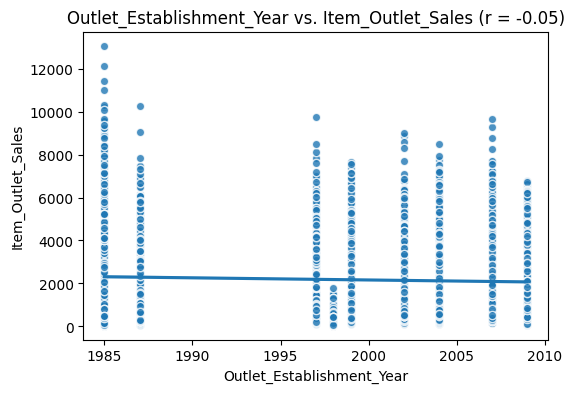

In [58]:
plot_numeric_vs_target(sales_df, 'Outlet_Establishment_Year');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes. It's a given that the greater the experience the safer an outlet.
  - Does this feature appear to be a predictor of the target?
    - Yes, but not to the extent that we expected. the correlation is way low

___

# Part 5

## imports and initial data cleansing

In [59]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

## addages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [60]:
from sklearn import set_config
set_config(transform_output='pandas')

> For Part 5, going back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.

In [61]:
fpath = "/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


> checking and dropping duplicates if existent

In [62]:
df.duplicated().sum()

0

> checking and fixing inconsistencies in categorical data

In [63]:
cat_cols = df.select_dtypes('object')
for col in cat_cols:
  print(df[col].value_counts())
  print()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Medium   

In [64]:
repl_dict = { 'LF': 'Low Fat',
              'low fat': 'Low Fat',
              'reg': 'Regular'}

df['Item_Fat_Content'].replace(repl_dict.keys(), repl_dict.values(), inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

> Identifying the features (X) and target (y)


In [65]:
# examining cardinality of categorical features ...
(df[df.select_dtypes('object').columns].nunique() / df.shape[0]) *100

Item_Identifier         18.291681
Item_Fat_Content         0.023466
Item_Type                0.187727
Outlet_Identifier        0.117330
Outlet_Size              0.035199
Outlet_Location_Type     0.035199
Outlet_Type              0.046932
dtype: float64

In [66]:
y = df['Item_Outlet_Sales']

# drop the "Item_Identifier" feature because it has very high cardinality.
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])

> Performing a train test split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Creating a preprocessing object to prepare the dataset for Machine Learning


In [68]:
# seeing for features with null values
print(X_train.isna().sum())
print('---------------------------------------------------------')
print(X_test.isna().sum())

Item_Weight                  1107
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1812
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64
---------------------------------------------------------
Item_Weight                  356
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  598
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64


In [69]:
num_cols = X_train.select_dtypes("number").columns

# Imputing with mean and scaling values
impute_mean = SimpleImputer(strategy='mean')

scaler = StandardScaler()

# Instantiate pipeline
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [70]:
# Save a list of ordinal features
ord_cols = ['Outlet_Size', 'Outlet_Location_Type']

# Impute null values using SimpleImputer using
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')

# Making the list of order lists for OrdinalEncoder
out_size_order = ['NA', 'Small', 'Medium', 'High']
out_loc_order = ['Tier 1', 'Tier 2', 'Tier 3']
ordinal_category_orders = [out_size_order, out_loc_order]

# using ordinalencoder and scaling the feature values
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
scaler_ord = StandardScaler()

# Instantiate the pipeline
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['NA', 'Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

In [71]:
# Save a list of nominal features
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns

# Use OneHotEncoder to encode the features
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [72]:
num_tuple = ('numeric', num_pipe, num_cols)
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ohe_tuple = ('categorical', ohe_encoder, ohe_cols)

In [73]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

In [74]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEn...egories=[['NA',
                                                                              'Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [75]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)


## Verifying feature scaling...

In [76]:
def check_scale(df, df_tf, feat):
  fig, axes = plt.subplots(nrows=2)

  # plot the original unscaled data
  sns.histplot(data=df, x=feat, ax=axes[0])
  axes[0].set_title('Original Data');

  # plot the scaled/transformed data
  sns.histplot(data=df_tf, x=feat, ax=axes[1], color='green');
  axes[1].set_title('Scaled Data');
  fig.tight_layout();

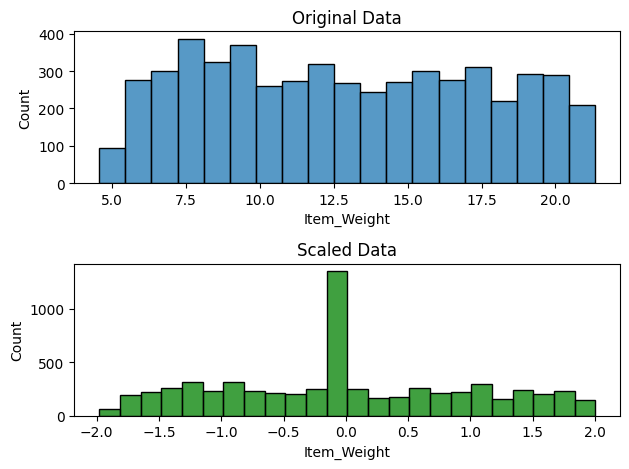

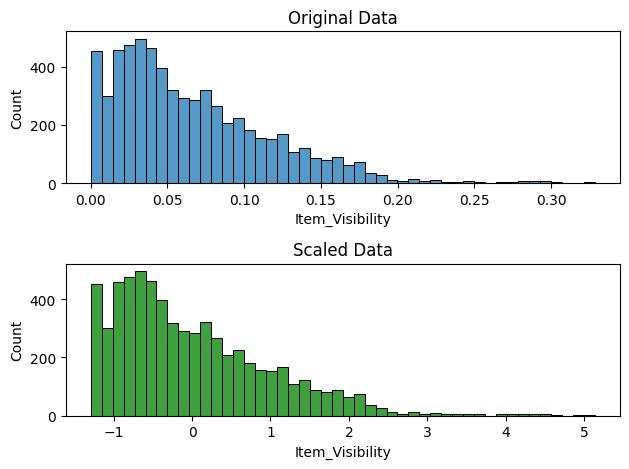

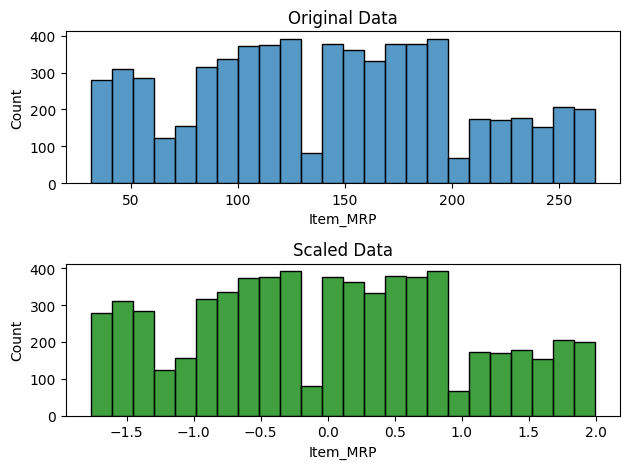

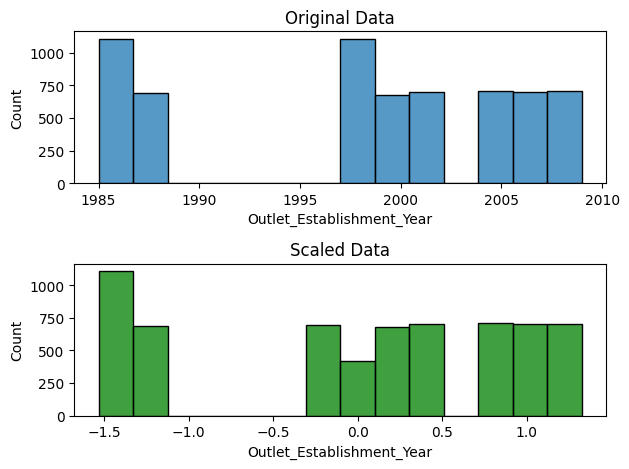

In [77]:
for col in num_cols:
  check_scale(X_train, X_train_processed, col);

In [78]:
corr_df = X_train.corr(numeric_only=True) - X_train_processed[num_cols].corr(numeric_only=True)
corr_df[corr_df != 0]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,NaN,-2.304640e-03,1.983073e-03,-1.585989e-03
Item_Visibility,-0.002305,NaN,3.686287e-17,-2.595146e-15
Item_MRP,0.001983,3.686287e-17,NaN,-2.017483e-15
Outlet_Establishment_Year,-0.001586,-2.595146e-15,-2.017483e-15,NaN


In [79]:
def regression_metrics(y_true, y_pred, label='', verbose = True,
                       output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)

  if verbose == True:
    # Print Result with Label and Header
    header = '*'*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"☛ MAE = {mae:,.3f}")
    print(f"☛ MSE = {mse:,.3f}")
    print(f"☛ RMSE = {rmse:,.3f}")
    print(f"☛ R^2 = {r_squared:,.3f}")

  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics


def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)


## CRISP-DM Phase 4 - Modeling

### 1. Your first task is to build a linear regression model to predict sales.

* Build a linear regression model.

In [80]:
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train_processed, y_train)        # X_train_processed, X_test_processed


LinearRegression()

* Use the custom evaluation function to get the metrics for your model (on training and test data).

In [81]:
evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test)

************************************************************
Regression Metrics: Training Data
************************************************************
☛ MAE = 847.129
☛ MSE = 1,297,558.136
☛ RMSE = 1,139.104
☛ R^2 = 0.562

************************************************************
Regression Metrics: Test Data
************************************************************
☛ MAE = 804.120
☛ MSE = 1,194,349.715
☛ RMSE = 1,092.863
☛ R^2 = 0.567


* Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?

> Given that the R-squared values for training and testing are .562 and .567 respectively. its safe to admit that the model is underfit since the training data value is barely above half of the entire metric range for overfitting.

### 2. Your second task is to build a Random Forest model to predict sales.

* Build a default Random Forest model.

In [82]:
rf = RandomForestRegressor(random_state = 42)

# Fit the model pipeline on the training data only
rf.fit(X_train_processed, y_train)


RandomForestRegressor(random_state=42)

* Use the custom evaluation function to get the metrics for your model (on training and test data).

In [83]:
evaluate_regression(rf, X_train_processed, y_train, X_test_processed, y_test)

************************************************************
Regression Metrics: Training Data
************************************************************
☛ MAE = 296.238
☛ MSE = 182,868.894
☛ RMSE = 427.632
☛ R^2 = 0.938

************************************************************
Regression Metrics: Test Data
************************************************************
☛ MAE = 767.014
☛ MSE = 1,220,320.148
☛ RMSE = 1,104.681
☛ R^2 = 0.558


* Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?

> Given that the R-squared values for training and testing are .938 and .558 respectively. its safe to admit that the model is overfit because the training data value is awfully close to 1.

* Compare this model's performance to the linear regression model: which model has the best test scores?

> Given that the testing R-squared values are .567 and .558 for models linear and random forest respectively. The linear model performs better.

### 3. Use GridSearchCV to tune at least two hyperparameters for a Random Forest model.

In [84]:
# Checking parameters
rf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [85]:
# Define param grid with options to try
params = {'max_depth': [None,10,15,20],
          'n_estimators':[10,100,150,200]
          }

# performing parameter maneouvers
gridsearch = GridSearchCV(rf, params, n_jobs=-1, cv = 3, verbose=1)
gridsearch.fit(X_train_processed, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'n_estimators': [10, 100, 150, 200]},
             verbose=1)

In [86]:
# best paarmeters
gridsearch.best_params_


{'max_depth': 10, 'n_estimators': 100}

* After determining the best parameters from your GridSearch, fit and evaluate a final best model on the entire training set (no folds).

In [87]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train_processed, y_train, X_test_processed, y_test)


************************************************************
Regression Metrics: Training Data
************************************************************
☛ MAE = 642.337
☛ MSE = 822,856.449
☛ RMSE = 907.114
☛ R^2 = 0.722

************************************************************
Regression Metrics: Test Data
************************************************************
☛ MAE = 738.031
☛ MSE = 1,129,132.909
☛ RMSE = 1,062.607
☛ R^2 = 0.591


* Compare your tuned model to your default Random Forest: did the performance improve?

> Yes the performance improved. given that the R-Squared value for training data was lowered, the effect of overfitting was brought down a little. At the same time the R-Squared value for the test data raised to .591

## CRISP-DM Phase 5 - Evaluation



### 4. You now have tried several different models on your data set. You need to determine which model to implement.

* Overall, which model do you recommend?

> I recommend the random forest model with tunned hyperparameters.

* Justify your recommendation.


> In terms of R-Squared, the training metrics are neither underfit as seen by the linear model nor overfit evident by the random forest before hyperparameter tunning. Plus it has the best R-Squared score on test data.

* In a Markdown cell:
  * Interpret your model's performance based on R-squared in plain English.
  * Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder in a way that is relevant to the original business problem (predicting sales).
  * Include why you selected this metric to explain to your stakeholder.
  * Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?

> * The model maps accurately not only 72% of the data it was trained but is also able to identify correctly the accurate results for about 59% of unseen new data.
* Referring to MAE, the difference between what we anticipated and what we received is 642.337 and 738.031 with respect to training and testing data
* looking at RMSE/MAE/MSE, the MAE is the simplest metric of the three. Since the stakeholders value simplicity explaining something complex to them would be a waste of their time.
* The model is average. Its neither overfit nor underfit as compared to the rest that hav been trained before it.